# 北尾早霧・砂川武貴・山田知明『定量的マクロ経済学と数値計算』日本評論社
## 第2章：2期間モデルと数値計算の概観

## 2.6 内生的格子法（Endogenous Gridpoint Method）
* 説明書きはこれから

In [17]:
struct Models
    # パラメータ
    β::Float64 #割引因子
    γ::Float64 #相対的危険回避度
    
    # 要素価格
    rent::Float64 #純利子率
    
    # グリッド
    na::Int64 #貯蓄グリッドの数
    a_max::Float64 #貯蓄グリッドの最大値
    a_min::Float64 #貯蓄グリッドの最小値
    grid_a::Vector{Float64} #貯蓄グリッド
end

In [18]:
function Calibration()
    # パラメータはここで設定をする
    β = 0.985^30
    γ = 2.0
    rent = 1.025^30 - 1.0
    na = 11
    a_max = 0.4
    a_min = 0.0

    grid_a = collect(LinRange(a_min, a_max, na))

    return Models(β, γ, rent, na, a_max, a_min, grid_a)
end

Calibration (generic function with 1 method)

In [19]:
params = Calibration();

In [20]:
function mu_CRRA(cons, γ)
    return cons^(-γ)
end

mu_CRRA (generic function with 1 method)

### オイラー方程式の右辺

In [21]:
function rhs_euler(a, params)

    # 老年期の限界効用
    mu = mu_CRRA((1.0 + params.rent)*a, params.γ)

    # オイラー方程式の右辺
    return params.β*(1.0 + params.rent)*mu

end

rhs_euler (generic function with 1 method)

### CRRA型効用関数の逆関数

In [22]:
function inv_mu_CRRA(mu, γ)
    return mu^(-1/γ)
end

inv_mu_CRRA (generic function with 1 method)

## 計算アルゴリズムのメインパート
* OptimizationやRootを探すといった事を一切していない！

In [23]:
rhs = zeros(params.na)
cons = zeros(params.na)
for i = 1:params.na
    rhs[i] = rhs_euler(params.grid_a[i], params)
    cons[i] = inv_mu_CRRA(rhs[i], params.γ)
end

## 予算制約からwを逆算する

In [24]:
w = zeros(params.na)
for i = 1:params.na
    w[i] = cons[i] + params.grid_a[i]
end
print(w)

[0.0, 0.11267323864644622, 0.22534647729289245, 0.3380197159393386, 0.4506929545857849, 0.5633661932322311, 0.6760394318786772, 0.7887126705251233, 0.9013859091715698, 1.0140591478180159, 1.1267323864644623]

In [25]:
using Plots
pyplot()

Plots.PyPlotBackend()

## 計算結果を出力

In [26]:
# 解析解
# テキストの(2.4)式
coef1 = (params.β*(1.0+params.rent))^(-1.0/params.γ)
coef2 = 1.0/(1.0+coef1*(1.0+params.rent))
a_cfs = coef2*w;

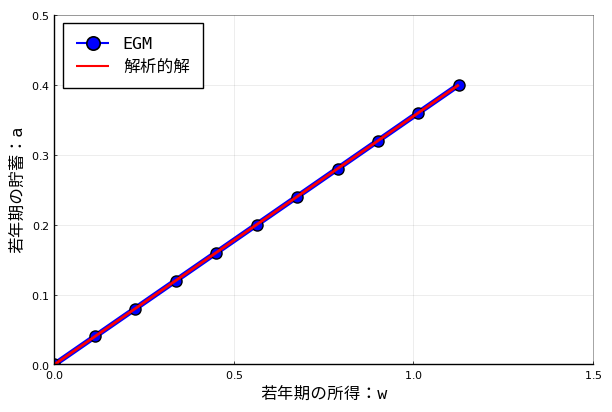

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [27]:
plt = plot(w, params.grid_a,
    color = :blue,
    marker = :circle,
    legend = :topleft,
    xlims = (0, 1.5),
    ylims = (0, 0.5),
    label = ("EGM"),
    xlabel = ("若年期の所得：w"),
    ylabel = ("若年期の貯蓄：a"),
    linewidth = 4,
    markersize = 8,
    titlefont = font("HackGen35Nerd", 12),
    guidefont = font("HackGen35Nerd", 12),
    tickfont = font("HackGen35Nerd", 8),
    legend_font_family = ("HackGen35Nerd"),
    legendfontsize = 12,
    framestyle = :semi
)
plot!(w, a_cfs, linewidth = 2, color = :red, label="解析的解")
#savefig("../figure/Fig2_pol_egm.pdf")
savefig("../figure/Fig2_pol_egm.eps")

---

## エクササイズ
* 